**На занятии сделал 1, 2 задание, начал 4 задание.
Вне занятия доделал 4, сделал 3, 5 задания и поправил во втором задании число эпох (с 1 до 5, 1 осталась по ошибке). 5 задание сделано в отдельном блокноте.**

Время выполнения всех заданий на GPU < 20мин.



# Вспомогательный код

Зафиксируем seeds для воспроизводимости результатов экспериментов.

In [ ]:
import numpy as np
import random
import torch


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)


set_random_seed(42)

# Задание 1. Функция свертки

Реализуйте функцию свёртки `conv(x, kernel, pad)`, где:

* $\text{x}$ — двумерный массив размером $(W,H)$;
* $\text{kernel}$ — ядро свёртки размером $(K_w, K_h)$;
* $\text{pad}$ — ширина дополнения с каждой из сторон массива, $\text{pad} \geq 0$.

Шаг ядра свёртки $\text{stride}$ полагается равным единице

Результатом работы функции будет массив $\text{out}$, содержащий результат свертки входных данных с $\text{kernel}$, имеющий размер $(W', H')$:

- $W' = 1 + (W + 2 \cdot pad - K_w)\ $;
- $H' = 1 + (H + 2 \cdot pad - K_h)\ $.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

Функция свертки:

In [ ]:
def conv(img, kernel, pad):
    # Your code here
    x = torch.zeros(((img.shape[0] + 2), (img.shape[0] + 2)))  # create zeros array to insert image in center
    x[pad:-pad, pad:-pad] += img
    print(x.shape)
    h, w = np.array(x.shape)
    kh, kw = np.array(kernel.shape)
    out = np.zeros((h - kh + 1, w - kw + 1))
    for i in range(h - kh + 1):
        for j in range(w - kw + 1):
            patch = x[i : i + kh, j : j + kw]
            new_pixel = np.multiply(patch, kernel).sum()
            out[i, j] = new_pixel
    return out
    pass

Тест

In [ ]:
# fmt: off
M = np.array([[0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0]])
# fmt: on

kernel = np.array([[1, 0, -1]])
actual = conv(M, kernel, pad=1)

print(actual.shape, "\n", actual)

# fmt: off
expected = np.array([[0, 0, 0, 0, 0],
                     [0, -1, 0, 1, 0],
                     [0, -1, 0, 1, 0],
                     [0, -1, 0, 1, 0],
                     [0, -1, 0, 1, 0],
                     [0, -1, 0, 1, 0],
                     [0, 0, 0, 0, 0]])
# fmt: on


assert np.array_equal(expected, actual), "Error"

torch.Size([7, 7])
(7, 5) 
 [[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]]


In [ ]:
M = np.array([[0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0]])
M.shape[0]

5

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) к изображению.

Выведите на экран:
* изначальное изображение,
* приближённые производные по вертикали,
* приближённые производные по горизонтали,
* норму градиента (корень от суммы квадратов производных).

In [ ]:
sobel_x = torch.tensor([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = torch.tensor([[ 1.0,  2.0, 1.0 ],
                               [ 0.0,  0.0, 0.0 ],
                               [-1.0, -2.0, -1.0]])

In [ ]:
camera = data.camera()

In [ ]:
hor = conv(camera, sobel_x, pad=1)

torch.Size([514, 514])


In [ ]:
vert = conv(camera, sobel_y, pad=1)

torch.Size([514, 514])


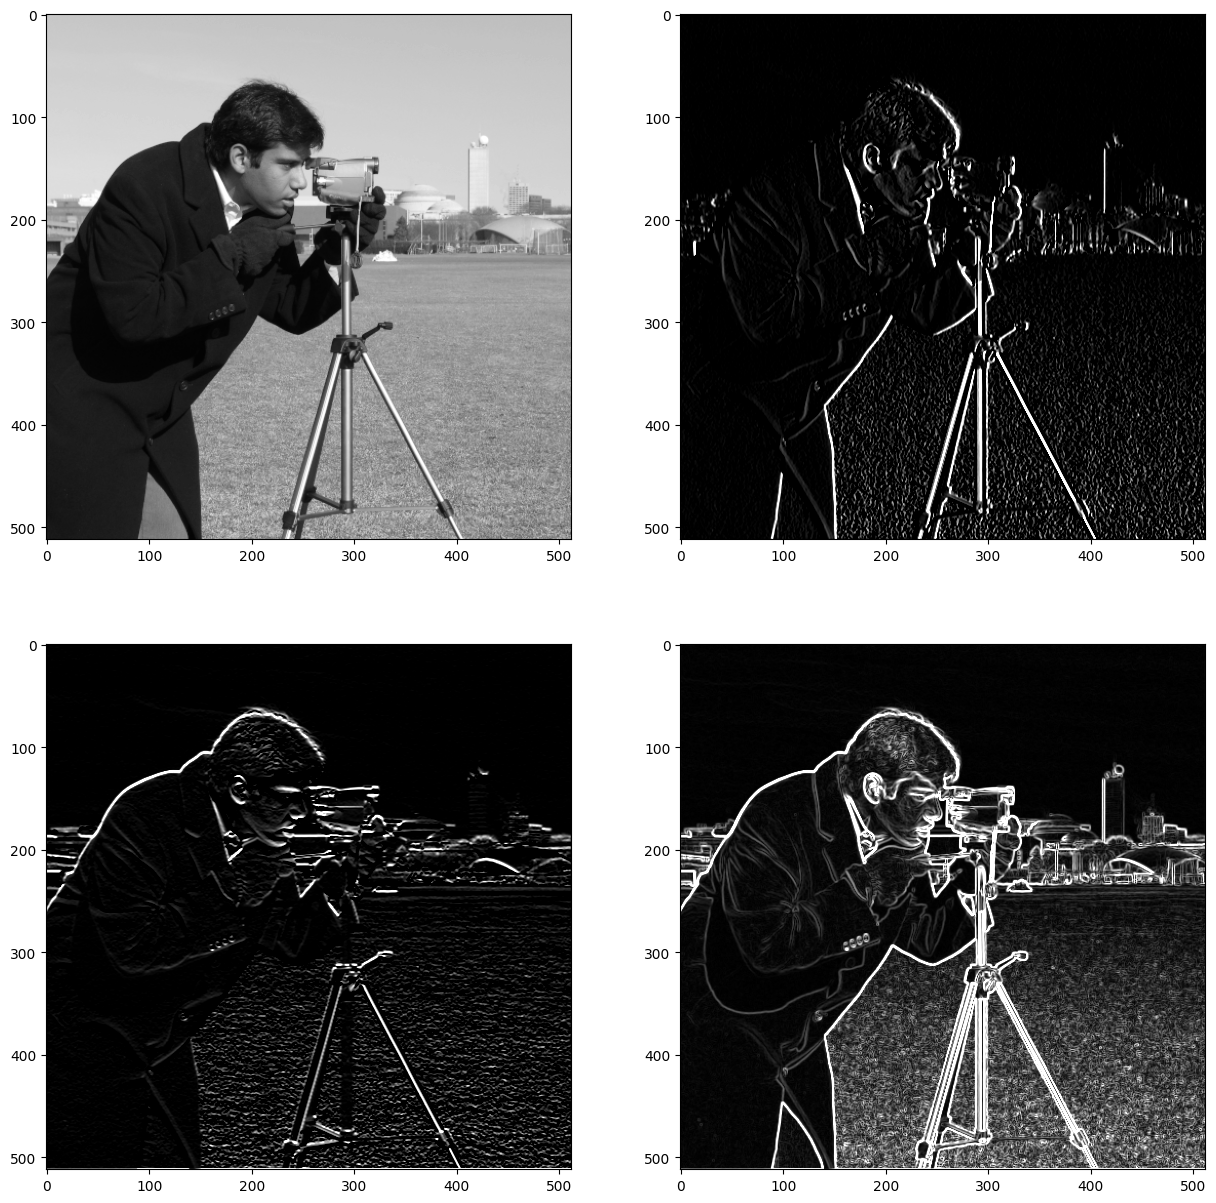

In [ ]:
camera = data.camera()
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].imshow(camera, cmap="gray", vmin=0, vmax=255)

# Your code here
axs[0, 1].imshow(hor, cmap="gray", vmin=0, vmax=255)
axs[1, 0].imshow(vert, cmap="gray", vmin=0, vmax=255)
axs[1, 1].imshow((hor ** 2 + vert ** 2) ** 0.5 , cmap="gray", vmin=0, vmax=255)
#скомбинировать не фильтры, а признаки

## Формат результата

Результатом являются 4 изображения, пример:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX06/result_1_task_ex06.png" width="500">


# Задание 2. Создание сверточной сети для  MNIST

Создайте сверточную сеть на PyTorch и обучите ее на MNIST.
* Используйте не более трёх [сверточных](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) и не более двух [полносвязных](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) слоев, а также слои [пулинга](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) (слой пулинга и аргумент `stride` у сверточных слоев помогут уменьшить число параметров линейного слоя).
* Не применяйте слои других типов.
* Функцию активации выберите на свое усмотрение.
* Рекомендуется использовать код для обучения из лекции №5.
* Отладку кода рекомендуем производить на небольшой части датасета (как обычно).

Импорт необходимых библиотек:

In [ ]:
import torch
import torch.nn as nn
from torch.nn.modules.pooling import MaxPool2d
from torchvision import datasets, transforms, utils
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split

Нейронная сеть:

In [ ]:
class MnistCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Your code here
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Conv2d(
            in_channels=1, out_channels=3, kernel_size=5
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(
            in_channels=3, out_channels=6, kernel_size=3
            ),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(600, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            )

    def forward(self, x):
        # Your code here
        scores = self.layers_stack(x)
        return scores

Функция для подсчета точности.
Изменять код в данном блоке не требуется.

In [ ]:
def get_correct_count(pred, labels):
    _, predicted = torch.max(pred.data, 1)
    return (predicted.cpu() == labels.cpu()).sum().item()


@torch.inference_mode()  # this annotation disable grad computation кусок кода позволит посчитать точность
def validate(model, test_loader, device="cpu"):
    correct, total = 0, 0
    for imgs, labels in test_loader:
        pred = model(imgs.to(device))
        total += labels.size(0)
        correct += get_correct_count(pred, labels)
    return correct / total

Загрузите [MNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST):

In [ ]:
# Your code here
from torchvision import datasets
from torchvision.transforms import ToTensor
from IPython.display import clear_output

train_data = datasets.MNIST(
    root="./MNIST", train=True, download=True, transform=ToTensor()
)

test_data = datasets.MNIST(
    root="./MNIST", train=False, download=True, transform=ToTensor()
)

clear_output()

print("Train data info:\n", train_data)
print("\nTest data info:\n", test_data)

Train data info:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

Test data info:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./MNIST
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
debug_train, _ = random_split(train_data, [10000, 50000])

Разместите код для обучения в этом блоке.

* Используйте GPU. Для этого Вам необходимо в верхней панели выбрать `Среда выполнения > Сменить среду выполнения` и заменить None на GPU.

* Для оценки точности используйте функцию `validate`.

* Подумайте над тем, чтобы поместить код для обучения в функцию или класс, который вы сможете использовать в следующих заданиях.

In [ ]:
len(debug_train)

10000

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

train_loader = DataLoader(train_data, batch_size=128, shuffle=False, drop_last=True)
model_train = MnistCNN().to(device)
# Your code here
def train_model(model, num_epochs=5, lr=1e-3):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=lr)
    for epoch in range(num_epochs):
        for imgs, labels in tqdm(train_loader):
            optimizer.zero_grad()  # Clean existing gradients
            outputs = model(imgs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()  # Backpropagate the gradients
            optimizer.step()
        print(f"\nEpoch {epoch} Loss {loss.item()}")

Using device: cpu


In [ ]:
train_model(model_train)
accuracy = validate(model_train, train_loader, device)

print(f"Accuracy on Train {accuracy:.2f}")

100%|██████████| 468/468 [00:15<00:00, 29.54it/s]



Epoch 0 Loss 2.1910767555236816


100%|██████████| 468/468 [00:15<00:00, 29.91it/s]



Epoch 1 Loss 0.12574046850204468


100%|██████████| 468/468 [00:15<00:00, 30.04it/s]



Epoch 2 Loss 0.07120657712221146


100%|██████████| 468/468 [00:15<00:00, 29.61it/s]



Epoch 3 Loss 0.04944697767496109


100%|██████████| 468/468 [00:18<00:00, 25.63it/s]



Epoch 4 Loss 0.03953859955072403
Accuracy on Train 0.94


Оценка результата на тестовой выборке:

In [ ]:
test_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.13), (0.3))]
)
testset = datasets.MNIST(root="./", train=False, download=True, transform = test_transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=True)

accuracy = validate(model_train, test_loader, device)

print(f"Accuracy on TEST {accuracy:.2f}")

100%|██████████| 9912422/9912422 [00:00<00:00, 119858942.91it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 40418983.59it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34233357.74it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16076395.58it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Accuracy on TEST 0.93


## Формат результата

Результатом является сверточная сеть, обученная на MNIST, с точностью не ниже 0.9

# Задание 3. Переход на Lightning

При обучении моделей в PyTorch нам постоянно приходится переписывать цикл обучения (train loop). Это дублирование кода, которое нарушает принцип [DRY](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself).

Кроме того, нам нужно следить за процессом обучения модели. Например, если loss взрывается или выходит на плато, как правило, есть смысл остановить обучение. Чтобы контролировать этот процесс, приходится добавлять дополнительный код для вывода и/или логирования метрик.

При проведении реальных экспериментов логирование результатов станет необходимым. И в этом задании вы научитесь работать с фреймворком [Lightning](https://lightning.ai/), который облегчает написание train loop, логирование результатов, и.т.п.

Подзадачи:

1. Перепишите tain loop из задания №2 с использованием фреймворка [Lightning](https://lightning.ai/).
2. Выберите [один из инструментов для работы с логами](https://lightning.ai/docs/pytorch/stable/extensions/logging.html), который поддерживат Lightning, и инициализируйте его.
3. Обучите модель из второго задания. В процессе обучения сохраняйте в лог значения accuracy/train, accuracy/val и loss/train на каждой эпохе.
4. Выведите графики метрик, собранных во время выполнения п.3


Можно использовать пакет [torchmetrics](https://torchmetrics.readthedocs.io/en/stable/).

[Дополнительная информация про логирование метрик](https://lightning.ai/docs/pytorch/stable/extensions/logging.html#automatic-logging)

Установка и импорт необходимых библиотек

In [ ]:
!pip install -q lightning torchmetrics tbparse

In [ ]:
import torch
import torchmetrics
import lightning as L
import torch.nn as nn
import matplotlib.pyplot as plt

from torch import optim
from tbparse import SummaryReader
from torch.nn.modules.pooling import MaxPool2d
from torchvision import datasets, transforms, utils

### Инициализация инструмента для работы с логами

Выберите [инструмент для работы с логами](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Flightning.ai%2Fdocs%2Fpytorch%2Fstable%2Fextensions%2Flogging.html) и инициализируйте его в блоке кода ниже.

По умолчанию Lightning иcпользует[TensorBoard]( https://pytorch.org/docs/stable/tensorboard.html), его запуск в браузере иногда завершается ошибкой. Подробнее про этот инструмент можно прочесть здесь:
[Tensorboard](https://github.com/Gan4x4/ml_snippets/blob/main/Training/Tensorboard.ipynb)


In [ ]:
# Init logger
from pytorch_lightning.loggers import TensorBoardLogger
logger = TensorBoardLogger(save_dir='./logs', name='my_model')
# Your code here


### Код LightningModule

Этим блоком мы заменим наш train loop из второго задания. Ваша задача — дописать недостающий код.

In [ ]:
import lightning as L
from torch import optim
import torchmetrics

class LitBasic(L.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
        self.valid_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
        self.loss_func = nn.CrossEntropyLoss()
        # Your code here

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.model.parameters(), momentum=0.9, lr=1e-3)# Your code here
        return optimizer

    def training_step(self, batch, batch_idx):
        # Your code here
        img, labels = batch
        pred = self.model(img)
        loss = self.loss_func(pred, labels)
        preds = torch.argmax(pred, dim=1)

        self.train_acc.update(preds, labels)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        img, labels = batch
        pred = self.model(img)
        loss = self.loss_func(pred, labels)
        preds = torch.argmax(pred, dim=1)

        self.valid_acc.update(preds, labels)
        self.log('valid_loss', loss)

    def on_train_epoch_end(self):
        self.log('train_acc', self.train_acc.compute(), prog_bar=True)
        self.train_acc.reset()

    def on_validation_epoch_end(self):
        self.log('valid_acc', self.valid_acc.compute(), prog_bar=True)
        self.valid_acc.reset()


### Подготовка датасета

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.13), (0.3))]
)

mnist = datasets.MNIST(root="./", train=True, download=True, transform=transform)

train_set, val_set, _ = torch.utils.data.random_split(mnist, [10000, 3000, 47000])

val_loader = torch.utils.data.DataLoader(val_set, batch_size=512, num_workers=2)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=512, num_workers=2)

In [ ]:
L.seed_everything(42)
model = MnistCNN()
lit_model = LitBasic(model)
trainer = L.Trainer(logger=logger, max_epochs=10, log_every_n_steps=5)
trainer.fit(model=lit_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | MnistCNN           | 78.5 K
1 | train_acc | MulticlassAccuracy | 0     
2 | valid_acc | MulticlassAccuracy | 0     
3 | loss_func | CrossEntropyLoss   | 0     
-------------------------------------------------
78.5 K    Trainable params
0         Non-trainable params
78.5 K    Total params
0.314     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | model

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


Полученные логи можно конвертировать в pandas при помощи [tbparse](https://github.com/j3soon/tbparse) и отобразить, используя matplotlib.

Чтобы получить таблицу, где названия метрик соответствуют названиям столбцов, используем параметр `pivot=True`.

In [ ]:
from tbparse import SummaryReader

log_dir = trainer.logger.experiment.get_logdir()  # lightning_logs/version_x

reader = SummaryReader(log_dir, pivot=True)
df = reader.scalars
df


,step,epoch,train_acc,train_loss,valid_acc,valid_loss
0,4,0.0,NaN,2.307505,NaN,NaN
1,9,0.0,NaN,2.309104,NaN,NaN
2,14,0.0,NaN,2.305858,NaN,NaN
3,19,"[0.0, 0.0, 0.0]",0.1025,2.297801,0.098667,2.305141
4,24,1.0,NaN,2.304363,NaN,NaN
5,29,1.0,NaN,2.305701,NaN,NaN
6,34,1.0,NaN,2.302349,NaN,NaN
7,39,"[1.0, 1.0, 1.0]",0.1062,2.294665,0.103333,2.301606
8,44,2.0,NaN,2.300768,NaN,NaN
9,49,2.0,NaN,2.302195,NaN,NaN


In [ ]:
df1 = df.dropna()

In [ ]:
df1

,step,epoch,train_acc,train_loss,valid_acc,valid_loss
3,19,"[0.0, 0.0, 0.0]",0.1025,2.297801,0.098667,2.305141
7,39,"[1.0, 1.0, 1.0]",0.1062,2.294665,0.103333,2.301606
11,59,"[2.0, 2.0, 2.0]",0.1109,2.291537,0.109333,2.298138
15,79,"[3.0, 3.0, 3.0]",0.1169,2.288146,0.118667,2.294399
19,99,"[4.0, 4.0, 4.0]",0.1286,2.284075,0.135000,2.289927
23,119,"[5.0, 5.0, 5.0]",0.1461,2.278692,0.159667,2.284153
27,139,"[6.0, 6.0, 6.0]",0.1734,2.271111,0.187333,2.276099
31,159,"[7.0, 7.0, 7.0]",0.2016,2.259746,0.211333,2.264168
35,179,"[8.0, 8.0, 8.0]",0.2240,2.241422,0.235333,2.245490
39,199,"[9.0, 9.0, 9.0]",0.2438,2.210892,0.255667,2.214337


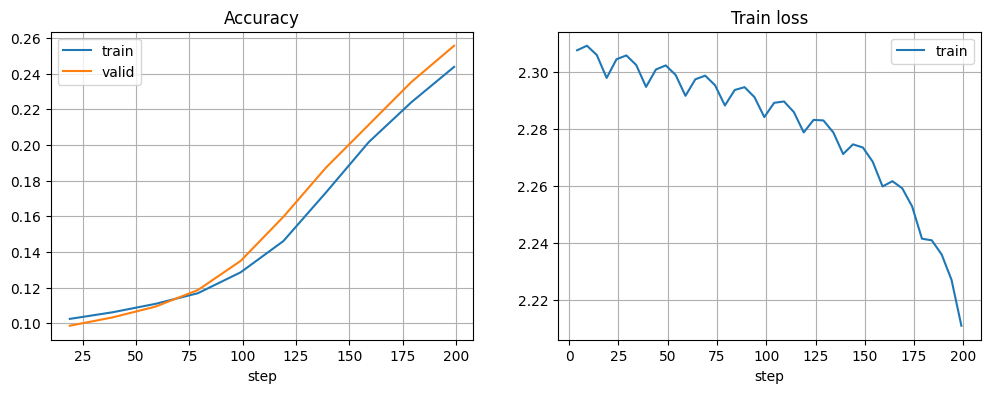

In [ ]:
def drop_nan(df, tag):
    return df[~df[tag].isna()].loc[:, tag]
# Your code here эта часть кода нужна, если тензор боард не запустится

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set(xlabel='step', title='Accuracy')
ax[0].grid()
ax[0].plot(df1['step'], df1['train_acc'], label='train')
ax[0].plot(df1['step'], df1['valid_acc'], label='valid')
ax[0].legend()

ax[1].set(xlabel='step', title='Train loss')
ax[1].grid()
ax[1].plot(df['step'], df['train_loss'], label='train')
ax[1].legend()
plt.show()

## Формат результата

Результатом является график, отрисованный при помощи выбранного вами инструмента. Пример:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX06/result_3_task_ex06.png" width="800">


# Задание 4. Собственные аугментации

В этом задании предлагается применить к датасету CIFAR-10 аугментации и визуализировать получившиеся результаты. Требуется воспользоваться готовыми аугментациями из `torchvision.transforms`, а также реализовать собственный метод для аугментации изображений.

Импорт необходимых библиотек:

In [ ]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from IPython.display import display
from PIL import Image

Функция для вывода изображений:

In [ ]:
def show_images(dataset, tag, img_count=32):
    """
    Helper method to display first img_count images from dataset
    """

    loader = DataLoader(dataset, batch_size=img_count)

    # Get first batch from dataloader
    dataiter = iter(loader)
    images, labels = next(dataiter)

    # create grid of images
    img_grid = torchvision.utils.make_grid(images)

    # plot
    plt.figure(figsize=(10, 7))
    plt.imshow(img_grid.permute((1, 2, 0)))
    plt.title(tag)
    plt.axis("off")
    plt.show()

Загрузите CIFAR-10 и:

* выберите два преобразования из [списка](https://pytorch.org/vision/stable/transforms.html),
* примените их к изображениям из датасета,
* выведите измененные изображения.

100%|██████████| 170498071/170498071 [00:03<00:00, 47067640.79it/s]


Extracting content/cifar-10-python.tar.gz to content


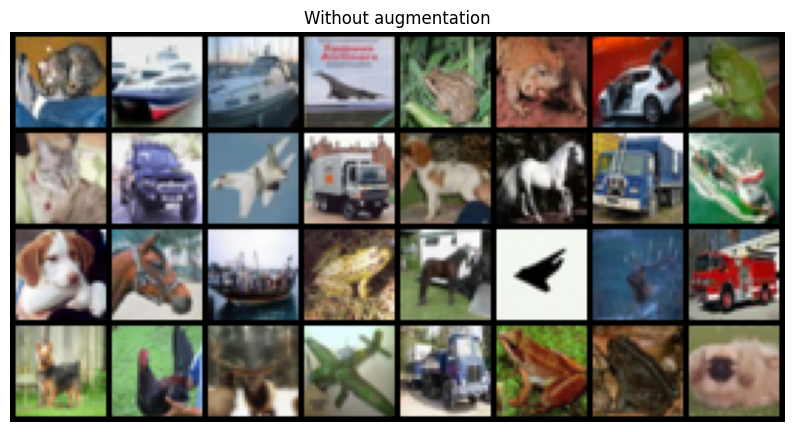

In [ ]:
testset = datasets.CIFAR10(
    "content",
    train=False,
    transform=transforms.Compose([transforms.ToTensor()]),
    download=True,
)

show_images(testset, "Without augmentation")

In [ ]:

img_1 = testset.data[0]
img_1[:, :, 2].shape

(32, 32)

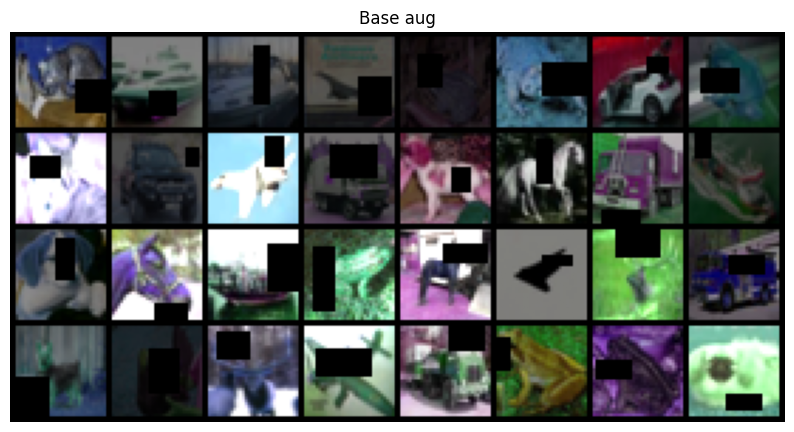

In [ ]:
base_augmentation = transforms.Compose(
    [
        transforms.ColorJitter(brightness=0.8, hue=0.5),
        transforms.ToTensor(), # Your code here
        transforms.RandomErasing(p=1, scale=(0.03, 0.2)),
    ]
)

testset.transform = base_augmentation
show_images(testset, "Base aug")

## Создание собственной аугментации
* Создайте собственную аугментацию, которой нет в `torchvision.transforms`. Например, сделайте изображение квадратным при помощи padding, или обнулите чать пикселей, или уменьшите изображение и затем восстановите его до прежнего размера ...

* Выведите измененные изображения. При использовании функции `show_images` обратите внимание, что список трансформаций должен содержать `transforms.ToTensor()`.

In [ ]:
''' Постараемся сделать подобие эффекта виньетки и эффекта обратной виньетки'''

def VignFilling(length, level_0=0.25, delta_level=0.05):
    matrix = np.zeros(length)
    for j in range(len(matrix)):
        if j < (len(matrix) / 2):
          matrix[j:j+1] = (level_0 + delta_level * j)
        elif j == (len(matrix) / 2):
          matrix[j:j+1] = matrix[j-1:j]
        else:
          matrix[j:j+1] = level_0 + delta_level * (len(matrix) - j - 1)
    return matrix

def ReversedVignFilling(length, level_0=1, delta_level=0.05):
    matrix = np.zeros(length)
    for j in range(len(matrix)):
        if j < (len(matrix) / 2):
          matrix[j:j+1] = (level_0 - delta_level * j)
        elif j == (len(matrix) / 2):
          matrix[j:j+1] = matrix[j-1:j]
        else:
          matrix[j:j+1] = delta_level * (1 + j - len(matrix)) + level_0
    return matrix

In [ ]:
vign_matrix_2d = np.zeros((32, 32))
for i in range(len(vign_matrix_2d[0])):
    vign_matrix_2d[i:i+1, :] = VignFilling(32)
vign_matrix_3d = np.stack([vign_matrix_2d for _ in range(3)], axis=0)
vign_matrix_3d

array([[[0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        ...,
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25]],

       [[0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        ...,
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25]],

       [[0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        ...,
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25],
        [0.25, 0.3 , 0.35, ..., 0.35, 0.3 , 0.25]]])

In [ ]:
reversed_vign_matrix_2d = np.zeros((32, 32))
for i in range(len(reversed_vign_matrix_2d[0])):
    reversed_vign_matrix_2d[i:i+1, :] = ReversedVignFilling(32)
reversed_vign_matrix_3d = np.stack([reversed_vign_matrix_2d for _ in range(3)], axis=0)
reversed_vign_matrix_3d

array([[[1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        ...,
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ]],

       [[1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        ...,
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ]],

       [[1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        ...,
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ],
        [1.  , 0.95, 0.9 , ..., 0.9 , 0.95, 1.  ]]])

In [ ]:
def CustomVign(img):
    img_new = (img * np.transpose(vign_matrix_3d, (2, 1, 0)) / 255)
    return img_new

def ReversedCustomVign(img):
    img_new = (img * np.transpose(reversed_vign_matrix_3d, (2, 1, 0)) / 255)
    return img_new

In [ ]:
class CustomVignetting():
    def __call__(self, img):
        transformed_img = CustomVign(img)
        return transformed_img

class ReversedCustomVignetting():
    def __call__(self, img):
        transformed_img = ReversedCustomVign(img)
        return transformed_img

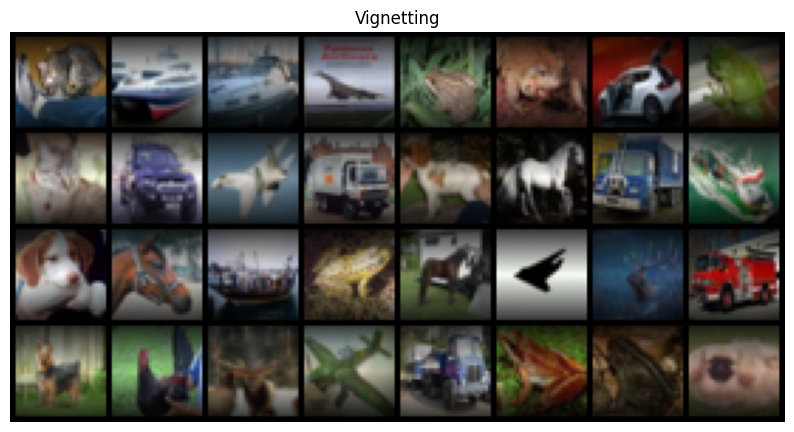

In [ ]:
# Your code here

vignetting = transforms.Compose(
    [
    CustomVignetting(),
    transforms.ToTensor()
    ]
)

testset.transform = vignetting
show_images(testset, "Vignetting")

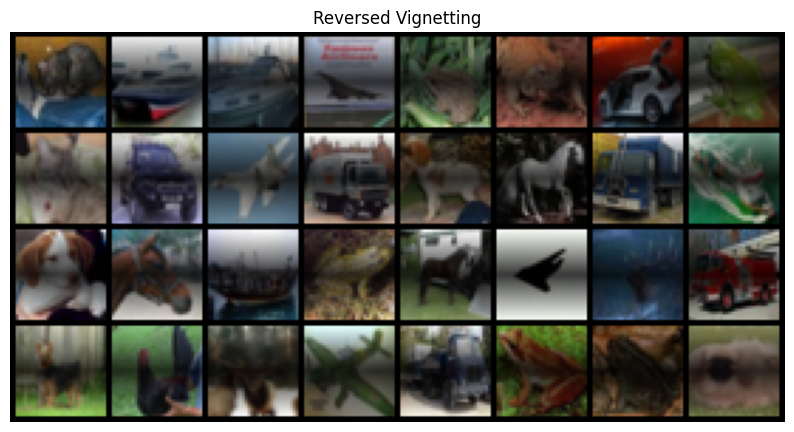

In [ ]:
# Your code here

reversed_vignetting = transforms.Compose(
    [
    ReversedCustomVignetting(),
    transforms.ToTensor()
    ]
)

testset.transform = reversed_vignetting
show_images(testset, "Reversed Vignetting")

## Формат результата

Выведенные изображения:
* без аугментаций,
* с двумя аугментациями из torchvision,
* со своей собственной аугментацией.


# Задание 5. Создание сверточной сети для CIFAR-10
Создайте сверточную сеть на PyTorch и обучите ее на СIFAR-10. Цель — получить лучшее качество, чем у полносвязной сети, которую мы обучали в 5-й лекции.

* Используйте не более трёх [сверточных](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) и не более двух [полносвязных](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) слоев, а также один слой [пулинга](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) между ними (слой пулинга и аргумент `stride` у сверточных слоев помогут сжать карту признаков).
* Не применяйте слои других типов.
* Функцию активации выберите на свое усмотрение.
* Допустимо применить аугментации к входным данным.
Импорт необходимых библиотек:

In [ ]:
!pip install -q lightning torchmetrics tbparse
# Init logger
from pytorch_lightning.loggers import TensorBoardLogger
logger = TensorBoardLogger(save_dir='./logs', name='my_model')

import torch
import torchmetrics
import torch.nn as nn
import lightning as L

from torch import optim
from torchsummary import summary
from torch.nn.modules.pooling import MaxPool2d
from torchvision import datasets, transforms, utils


Завершите реализацию модели

In [ ]:
class CifarCNN(nn.Module):
    def __init__(self):
        # Your code here от мниста отличается размером каналов изображений. Побольше каналов (16, 32)
        super().__init__()
        # Your code here
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Conv2d(
            in_channels=3, out_channels=32, kernel_size=5
            ),
            nn.ReLU(),
            nn.Conv2d(
            in_channels=32, out_channels=64, kernel_size=5
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            #nn.Conv2d(
            #in_channels=32, out_channels=64, kernel_size=3
            #),
            #nn.ReLU(),
            nn.Flatten(),
            nn.Linear(746496, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
            )

    def forward(self, x):
        # Your code here
        scores = self.layers_stack(x)
        return scores

Загрузите CIFAR-10:

In [ ]:
# Your code here отладка на малой части датасета. аугментация тоже может немного повысить качество
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor, Resize, Normalize, Compose
from torch.utils.data import DataLoader, random_split

torch.manual_seed(42)

transform = Compose(
    [Resize(224), ToTensor(), Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
)

cifar = CIFAR10(root="CIFAR10", train=True, download=True, transform=transform)
cifar_test = CIFAR10(root="CIFAR10", train=False, download=True, transform=transform)

train_set_cifar, val_set_cifar = torch.utils.data.random_split(cifar, [45000, 5000])
batch_size = 64

train_loader = DataLoader(
    train_set_cifar, batch_size=batch_size, shuffle=True, num_workers=2
)
val_loader = DataLoader(
    val_set_cifar, batch_size=batch_size, shuffle=False, num_workers=2
)
test_loader = DataLoader(
    cifar_test, batch_size=batch_size, shuffle=False, num_workers=2
)

Разместите код для обучения в этом блоке.

* Используйте GPU. Для этого Вам необходимо в верхней панели выбрать `Среда выполнения > Сменить среду выполнения` и заменить `Hardware accelerator` на T4 GPU или другой доступный GPU ускоритель.

* Используйте Lightning. Рекомендуем унаследоваться от класса `LitBasic` из задания №3 и реализовать в классе-наследнике методы для проверки результатов на тестовом датасете. Можете использовать `self.valid_acc` или определить другой атрибут класса.

In [ ]:
import lightning as L
from torch import optim
import torchmetrics

class LitBasic(L.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
        self.valid_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
        self.loss_func = nn.CrossEntropyLoss()
        # Your code here

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.model.parameters(), momentum=0.9, lr=1e-3)# Your code here
        return optimizer

    def training_step(self, batch, batch_idx):
        # Your code here
        img, labels = batch
        pred = self.model(img)
        loss = self.loss_func(pred, labels)
        preds = torch.argmax(pred, dim=1)

        self.train_acc.update(preds, labels)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        img, labels = batch
        pred = self.model(img)
        loss = self.loss_func(pred, labels)
        preds = torch.argmax(pred, dim=1)

        self.valid_acc.update(preds, labels)
        self.log('valid_loss', loss)

    def on_train_epoch_end(self):
        self.log('train_acc', self.train_acc.compute(), prog_bar=True)
        self.train_acc.reset()

    def on_validation_epoch_end(self):
        self.log('valid_acc', self.valid_acc.compute(), prog_bar=True)
        self.valid_acc.reset()

class LitTest(LitBasic):

    def __init__(self, model):
        super().__init__(model)
        self.test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)

    def test_step(self, batch, batch_idx):
        # Your code here
        img, labels = batch
        pred = self.model(img)
        loss = self.loss_func(pred, labels)
        preds = torch.argmax(pred, dim=1)

        self.test_acc.update(preds, labels)
        self.log('test_loss', loss)
        return loss

    def on_test_epoch_end(self):
        # Your code here
        self.log('test_acc', self.test_acc.compute(), prog_bar=True)
        self.test_acc.reset()
# Your code here
L.seed_everything(42)
model = CifarCNN()
lit_model = LitBasic(model)
trainer = L.Trainer(logger=logger, max_epochs=20, log_every_n_steps=5)
trainer.fit(model=lit_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

## Оценка результата на тестовой выборке

Загрузите тестовую часть датасета и используйте метод `trainer.test`

In [ ]:
# Your code here
lit_model_test = LitTest(model)
trainer.test(model=lit_model_test, dataloaders=test_loader)

## Формат результата
Результатом является сверточная сеть, обученная на CIFAR-10, с точностью не ниже 0.6

**Вывод: для работы сверточной сети на CIFAR-10 необходимо увеличить число каналов изображения по сравнению с MNIST (3-32, 32-64). При использовании выбранной архитектуры для достижения нужной точности хватило 13 эпох обучения, но пришлось снизить размер батча с 256 до 64 (т.к. модель не влезала по памяти в CUDA).**